# Task 1: Supervised ML
# DEEKSHA MAHESHWARI

In [1]:
## Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

In [2]:
## Reading the dataset from the given url

url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print('Data imported successfully')

Data imported successfully


In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
## Checking if dataset has missing values

df.isnull().sum()

Hours     0
Scores    0
dtype: int64

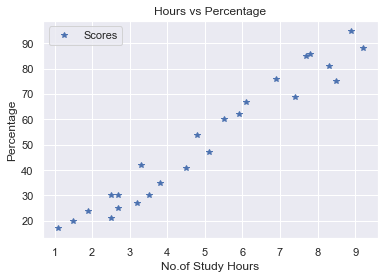

In [7]:
## Plotting the dataset

df.plot(x='Hours',y='Scores',style = '*')
plt.title("Hours vs Percentage")
plt.xlabel("No.of Study Hours")
plt.ylabel("Percentage")
plt.show()

#### The above scatter plot shows that there is a positive correlation between number of study hours and precentage of a student.

In [8]:
## To see correlation between the two variables

df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### we see that Percentage and No of Study Hours are 97.62% correlated.

## Declaring the variables

In [9]:
x = df.iloc[:, :-1].values  ##independent
y = df.iloc[:, 1:].values   ##dependent

In [10]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [11]:
## Splitting the dataset into training and testing data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size= 0.2, random_state=0)

## Simple Linear Regression

In [12]:
reg = LinearRegression()
reg.fit(x_train, y_train)
print('Training Complete')

Training Complete


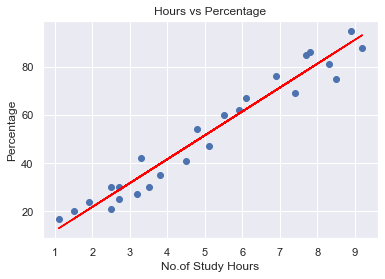

In [13]:
## Plotting the regression line
line = reg.intercept_ + reg.coef_ * x

## plotting for the test data
plt.scatter(x, y)
plt.plot(x, line, color="red")
plt.title("Hours vs Percentage")
plt.xlabel("No.of Study Hours")
plt.ylabel("Percentage")
plt.show()

## Making Predictions

In [14]:
print(x_test)
yhat = reg.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [15]:
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

### Comparing Actual values with Predicted values

In [16]:
comparison = pd.DataFrame({'Actual':[y_test],'Predicted': [yhat]}, index=[0])
comparison

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


### What will be predicted score if a student studies for 9.25 hrs/ day?

In [17]:
own_prediction = reg.predict([[9.25]])
print("The Predicted score if a person studies for 9.25 hours is",own_prediction[0])

The Predicted score if a person studies for 9.25 hours is [93.69173249]


## Evaluating the model

In [18]:
from sklearn import metrics

In [19]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,yhat))
print("R squared: ", metrics.r2_score(y_test,yhat))

Mean Absolute Error:  4.183859899002975
R squared:  0.9454906892105356
